In [3]:
import classifier as clf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from itertools import cycle
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate

In [4]:
train = pd.read_csv('train_data.csv')
train

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


In [5]:
train = train.to_numpy()
R_train = train[:, 0:5]
L_train = train[:, 5]
R_train

array([[0.0, 0.0, 0.0, 0.0, 0.0],
       [0.08, 0.08, 0.1, 0.24, 0.9],
       [0.06, 0.06, 0.05, 0.25, 0.33],
       ...,
       [0.54, 0.82, 0.71, 0.29, 0.77],
       [0.5, 0.75, 0.81, 0.61, 0.26],
       [0.66, 0.9, 0.76, 0.87, 0.74]], dtype=object)

In [6]:
w0 = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
w_history = clf.weight_train(w0, R_train, tol = 1e-3)
#w_history

In [7]:
classes = np.array(['very_low', 'Low', 'Middle', 'High'])
R_Lp = clf.center_find(R_train, L_train, classes)
R_Lp

array([[0.30579167, 0.198125  , 0.36625   , 0.35875   , 0.09083333],
       [0.32114458, 0.337     , 0.43072289, 0.4973494 , 0.23762651],
       [0.39997727, 0.36792045, 0.50681818, 0.34284091, 0.54238636],
       [0.42165079, 0.42319048, 0.50166667, 0.50126984, 0.77253968]])

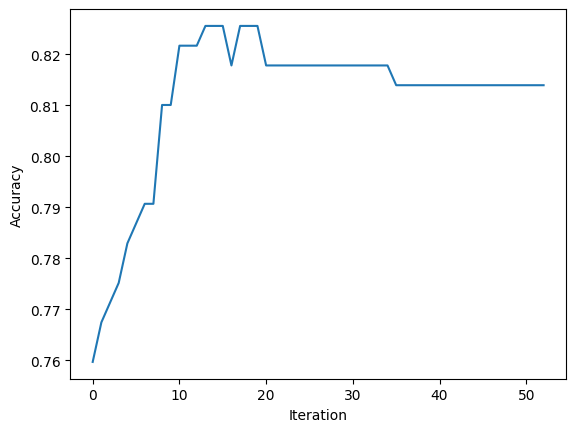

[0.00296427 0.01724675 0.17334955 0.04136175 0.76507768]


In [8]:
x = np.arange(w_history.shape[0])
y = np.zeros_like(x, dtype = 'float')
for i in range(x.shape[0]):
    y[i] = clf.accuracy(clf.labeling(R_train, R_Lp, classes, w_history[i],'eu'), L_train)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(x, y)
plt.show()
w = clf.early_stopping(w_history, L_train, R_train, R_Lp, classes,'eu')
print(w)

In [9]:
test = pd.read_csv('test_data.csv')
test

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High
...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,High
141,0.85,0.82,0.66,0.83,0.83,High
142,0.56,0.60,0.77,0.13,0.32,Low
143,0.66,0.68,0.81,0.57,0.57,Middle


In [10]:
test = test.to_numpy()
R_test = test[:, 0:5].astype('float')
L_test = test[:, 5].astype('<U8')
#L_test

In [11]:
classes = np.array(['Very Low', 'Low', 'Middle', 'High'])
L_pred = clf.labeling(R_test, R_Lp, classes, w, 'eu')
#L_pred

In [12]:
clf.accuracy(L_pred, L_test)

0.8827586206896552

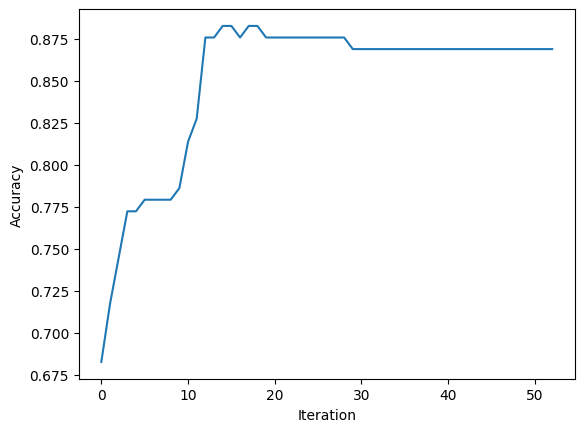

In [13]:
x1 = np.arange(w_history.shape[0])
y1 = np.zeros_like(x, dtype = 'float')
for i in range(x.shape[0]):
    y[i] = clf.accuracy(clf.labeling(R_test, R_Lp, classes, w_history[i],'eu'), L_test)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(x, y)
plt.show()

In [14]:
ACC = clf.acc(L_pred, L_test)
SEN = clf.sen(L_pred, L_test)
SPEC = clf.spec(L_pred, L_test)
PRE = clf.pre(L_pred, L_test)
F1 = clf.f1_score(L_pred, L_test)
for i in range (classes.shape[0]):
    print ("Accuracy of",classes[i] + " is",ACC[i])
    print ("Sensitivity of",classes[i] + " is",SEN[i])
    print ("Specificity of",classes[i] + " is",SPEC[i])
    print ("Precision of",classes[i] + " is",PRE[i])
    print ("F1 score of",classes[i] + " is",F1[i])
    print("\n")

Accuracy of Very Low is 0.9724137931034482
Sensitivity of Very Low is 1.0
Specificity of Very Low is 0.9636363636363636
Precision of Very Low is 0.8974358974358975
F1 score of Very Low is 0.9459459459459459


Accuracy of Low is 0.9103448275862069
Sensitivity of Low is 0.7894736842105263
Specificity of Low is 0.9886363636363636
Precision of Low is 0.9782608695652174
F1 score of Low is 0.8737864077669902


Accuracy of Middle is 0.903448275862069
Sensitivity of Middle is 0.8571428571428571
Specificity of Middle is 0.9145299145299145
Precision of Middle is 0.7058823529411765
F1 score of Middle is 0.7741935483870968


Accuracy of High is 0.9793103448275862
Sensitivity of High is 0.96
Specificity of High is 0.9833333333333333
Precision of High is 0.9230769230769231
F1 score of High is 0.9411764705882353




In [28]:
clf.confusion_matrix(L_pred, L_test)

array([[[ 35,   4],
        [106,   0]],

       [[ 45,   1],
        [ 87,  12]],

       [[ 24,  10],
        [107,   4]],

       [[ 24,   2],
        [118,   1]]])

In [29]:
result = []
for i in range (classes.shape[0]):
    result.append([classes[i],round(ACC[i],2),round(SEN[i],2),round(SPEC[i],2),round(PRE[i],2),round(F1[i],2)])
result
col_names = ["Classes", "ACC", "SEN", "SPEC", "PRE", "F1"]
print(tabulate(result, headers=col_names))

Classes      ACC    SEN    SPEC    PRE    F1
---------  -----  -----  ------  -----  ----
Very Low    0.97   1       0.96   0.9   0.95
Low         0.91   0.79    0.99   0.98  0.87
Middle      0.9    0.86    0.91   0.71  0.77
High        0.98   0.96    0.98   0.92  0.94
